# From Part 1 code : https://colab.research.google.com/drive/1DyXf1VKLAy3DyqB0STkvhbHTzAeTpGZE#

In [ ]:
!pip install cohere
import cohere
from google.colab import userdata

##**Make sure to place your Cohere api key in the Secrets (key icon) section of collab as 'COHERE_API_KEY', or use it directly in the code**

In [ ]:
import faiss
import numpy as np
import pdfplumber
from sentence_transformers import SentenceTransformer
import cohere
import gradio as gr

# Initialize Cohere API and Sentence Transformer
api_key = userdata.get('COHERE_API_KEY') #insert your cohere api key
cohere_client = cohere.Client(api_key)  # Replace with your Cohere API key
model = SentenceTransformer('all-MiniLM-L6-v2')
embedding_dim = 384  # Embedding dimension of 'all-MiniLM-L6-v2'

# Helper function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        text = ""
        for page in pdf.pages:
            text += page.extract_text()
    return text

# Generate answer based on relevant text
def generate_answer(query, relevant_chunks):
    context = " ".join(relevant_chunks)
    response = cohere_client.generate(prompt=f"Answer the question: {query} using the document's relevant context: {context}")
    return response.generations[0].text

# FAISS retrieval function
def retrieve_relevant_chunks_faiss(query, model, index, document_embeddings, document_chunks, top_k=5):
    query_embedding = model.encode([query])[0].astype(np.float32)
    query_embedding = query_embedding.reshape(1, -1)  # Reshape to be 2D for FAISS
    distances, indices = index.search(query_embedding, top_k)  # Search for top_k nearest neighbors
    relevant_chunks = [document_chunks[i] for i in indices[0]]  # Get relevant document chunks
    return relevant_chunks, distances

# Main QA bot function for a given query
def QAbot(query, document_embeddings, document_chunks, index):
    relevant_chunks, distances = retrieve_relevant_chunks_faiss(query, model, index, document_embeddings, document_chunks)
    answer = generate_answer(query, relevant_chunks)
    print("Your Query:", query)
    print("Answer:", answer)
    return answer

# Full document processing and query answering function
def QAbotdoc(document_path, query):
    document_text = extract_text_from_pdf(document_path)
    document_chunks = [document_text[i:i + 300] for i in range(0, len(document_text), 512)]

    # Encode document chunks into embeddings
    document_embeddings = model.encode(document_chunks)

    # Create FAISS index and add embeddings
    index = faiss.IndexFlatL2(embedding_dim)
    faiss_embeddings = np.array(document_embeddings).astype(np.float32)
    index.add(faiss_embeddings)

    # Retrieve and answer the query
    relevant_chunks, distances = retrieve_relevant_chunks_faiss(query, model, index, document_embeddings, document_chunks)
    answer = generate_answer(query, relevant_chunks)

    print("Your Query:", query)
    print("Answer:", answer)
    return relevant_chunks, answer


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
!pip install faiss-cpu cohere sentence-transformers pdfplumber gradio

import faiss
import numpy as np
import pdfplumber
from sentence_transformers import SentenceTransformer
import cohere
import gradio as gr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.1/233.1 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


# Part 2: Interactive interface for users to upload documents

## Using Gradio

In [ ]:
!pip install gradio --upgrade

In [ ]:
import gradio as gr

def gradio_interface(pdf_file, query):
    relevant_chunks, answer = QAbotdoc(pdf_file.name, query)
    return "\n\n".join(relevant_chunks), answer

# Launch Gradio interface
interface = gr.Interface(
    fn=gradio_interface,
    inputs=[gr.File(label="Upload PDF"), gr.Textbox(label="Enter your query")], # Use gr.File and gr.Textbox directly
    outputs=[gr.Textbox(label="Relevant Document Segments"), gr.Textbox(label="Generated Answer")]
)

interface.launch(debug = True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://6336b6a8fb89a82dcb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Your Query: What is Part 1 of the assignment?
Answer:  Using a vector database like Pinecone DB, the first part of the assignment is to create a Retrieval-Augmented Generation (RAG) model for a Question Answering (QA) bot intended for use in a business setting. The RAG model should efficiently store and retrieve document embeddings, and should be tested by demonstrating its ability to retrieve and generate accurate answers to sample queries. 
Your Query: State  Part 1 of the assignment?
Answer:  The first part of the assignment is to develop a Retrieval-Augmented Generation (RAG) model for a Question Answering (QA) bot for a business. The RAG model should utilize a vector database (like Pinecone DB) to store and retrieve document embeddings efficiently, alongside a generative model to provide the answers. The goal is to create a system that can process questions from a user, scan the vector database for relevant document embeddings, and generate accurate responses. 

To complete this a

#User Interface
When Run this interface would be visible which would allow the user to Upload the pdf and enter the query.
After running the above cellUser can also use the url given in the output to open the UI in another tab .

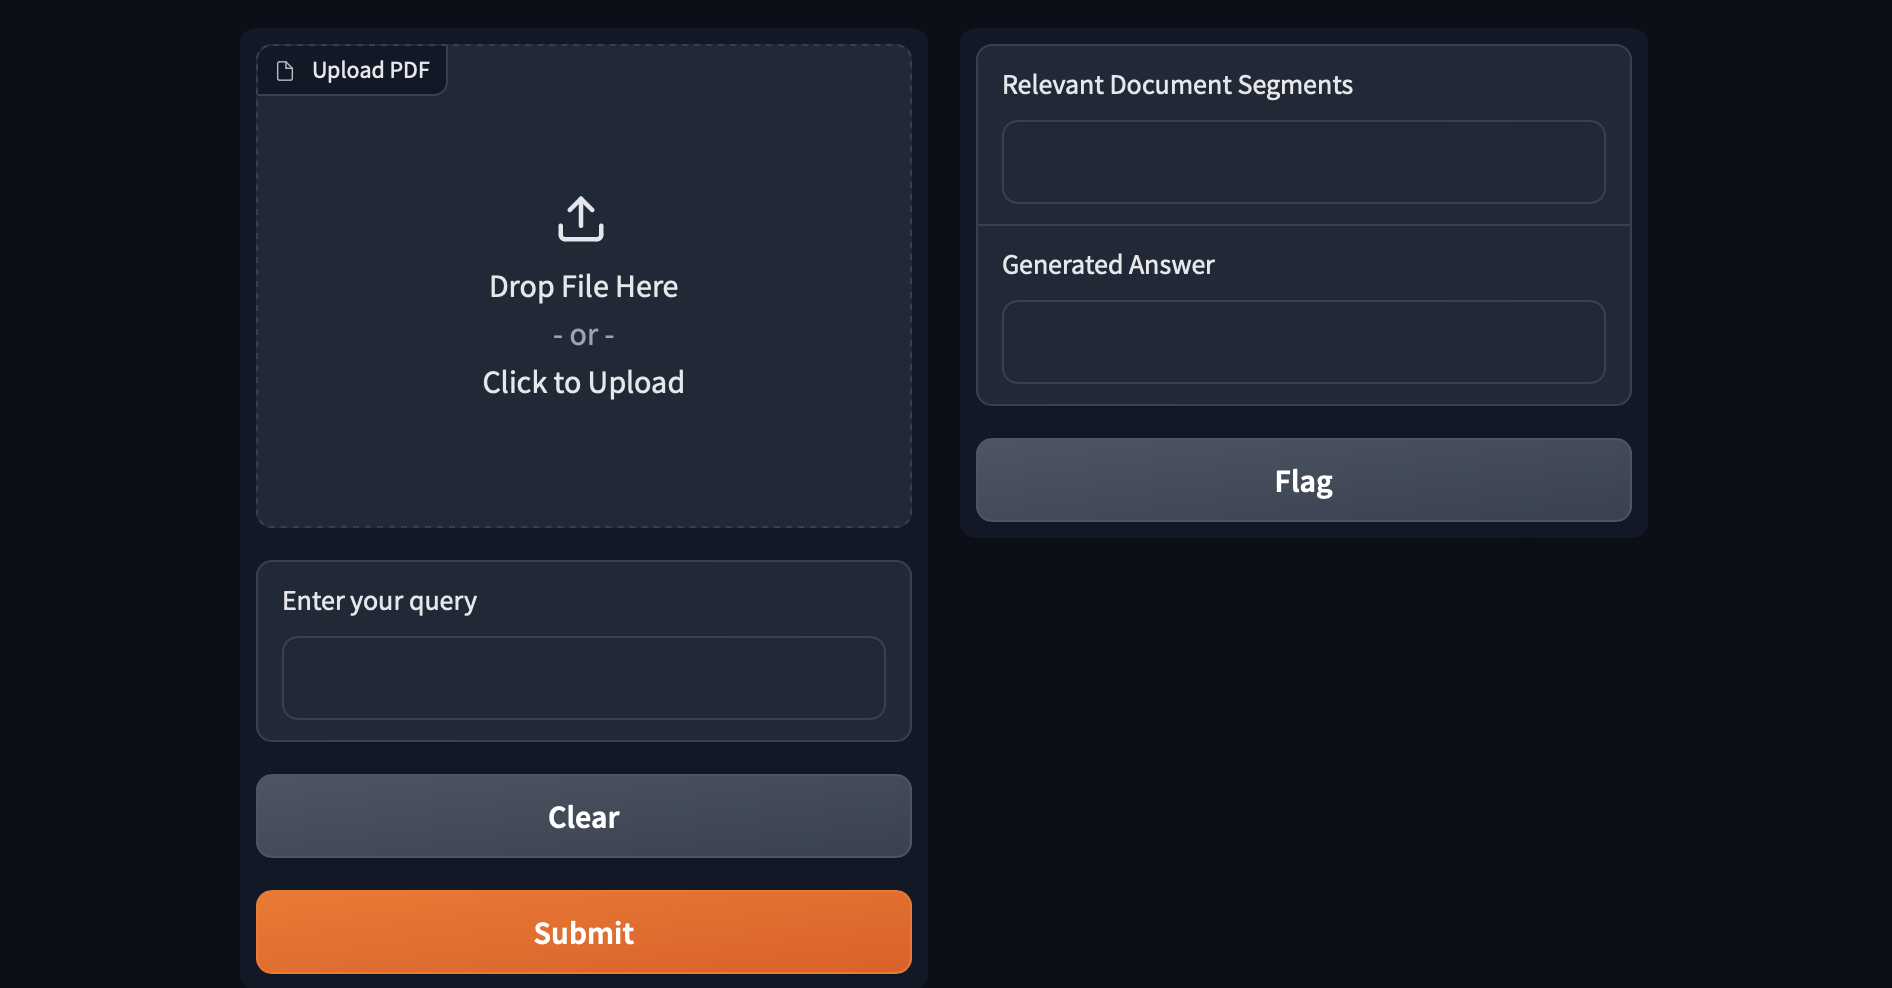

#Upload the document in .pdf format and Enter your question

* User also has option to clear the pdf to upload a new one, if the pdf is not cleared, user can ask multiple queries with the same document

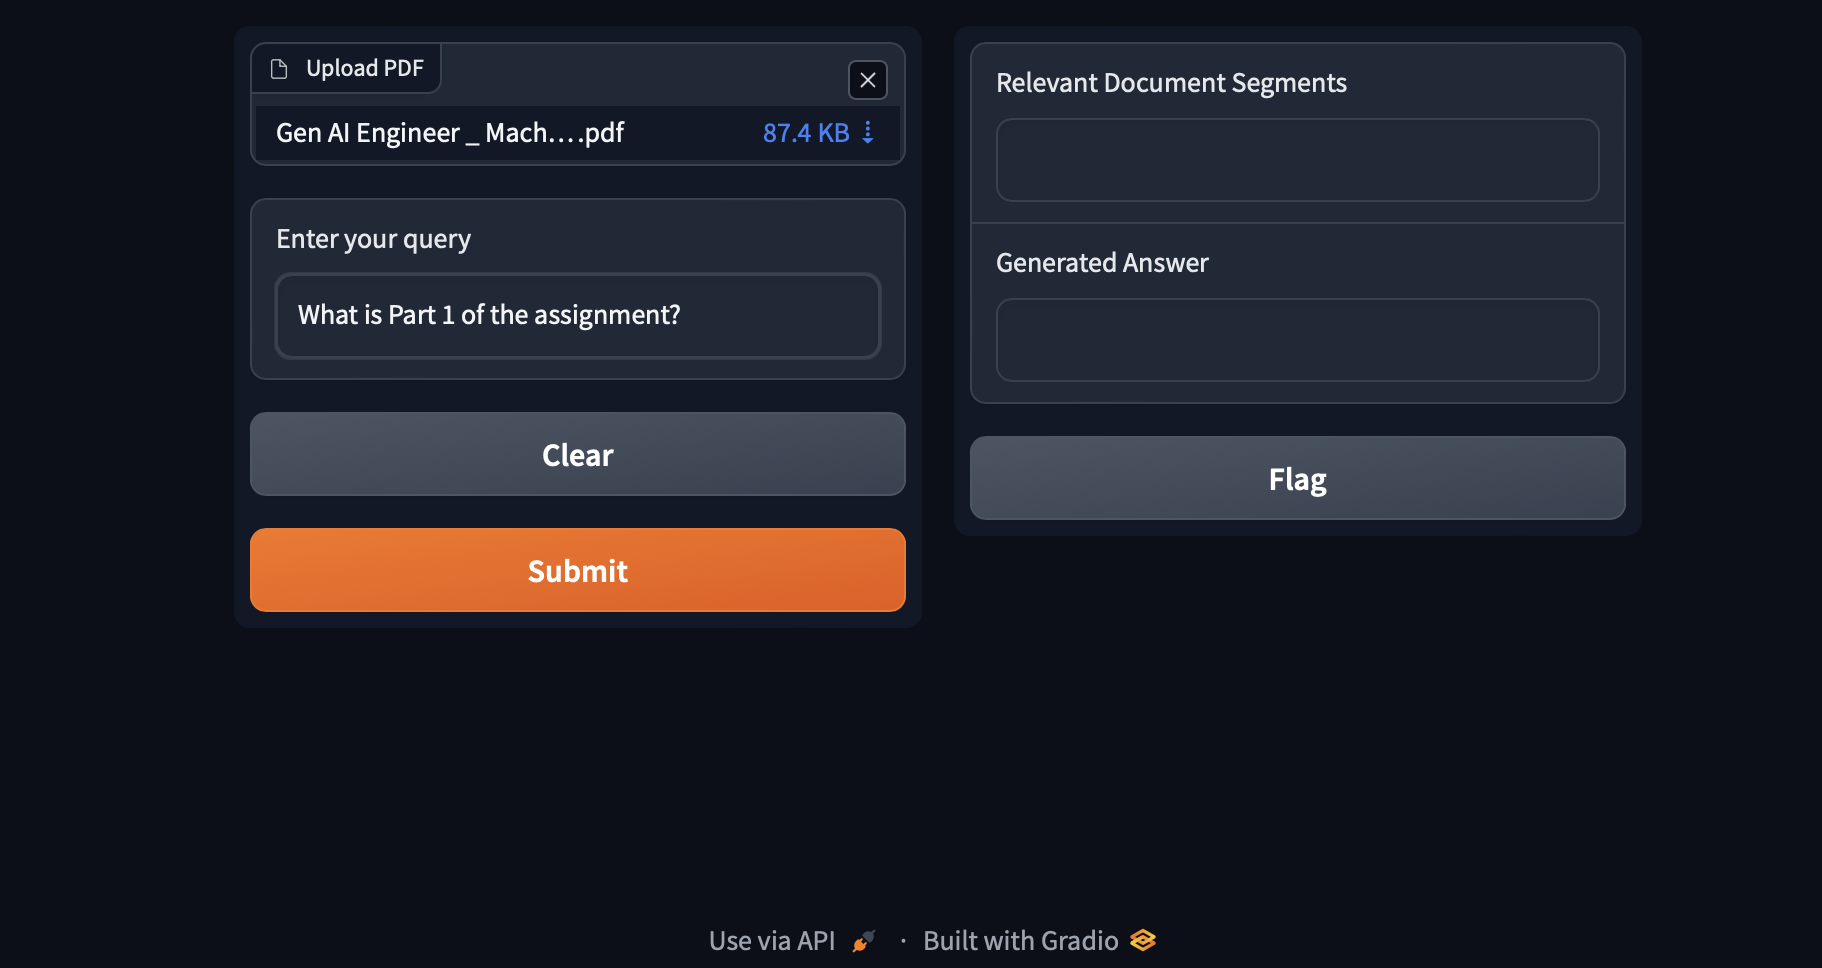

#Submit
**Hit submit to view the Answer and Relevant Document**

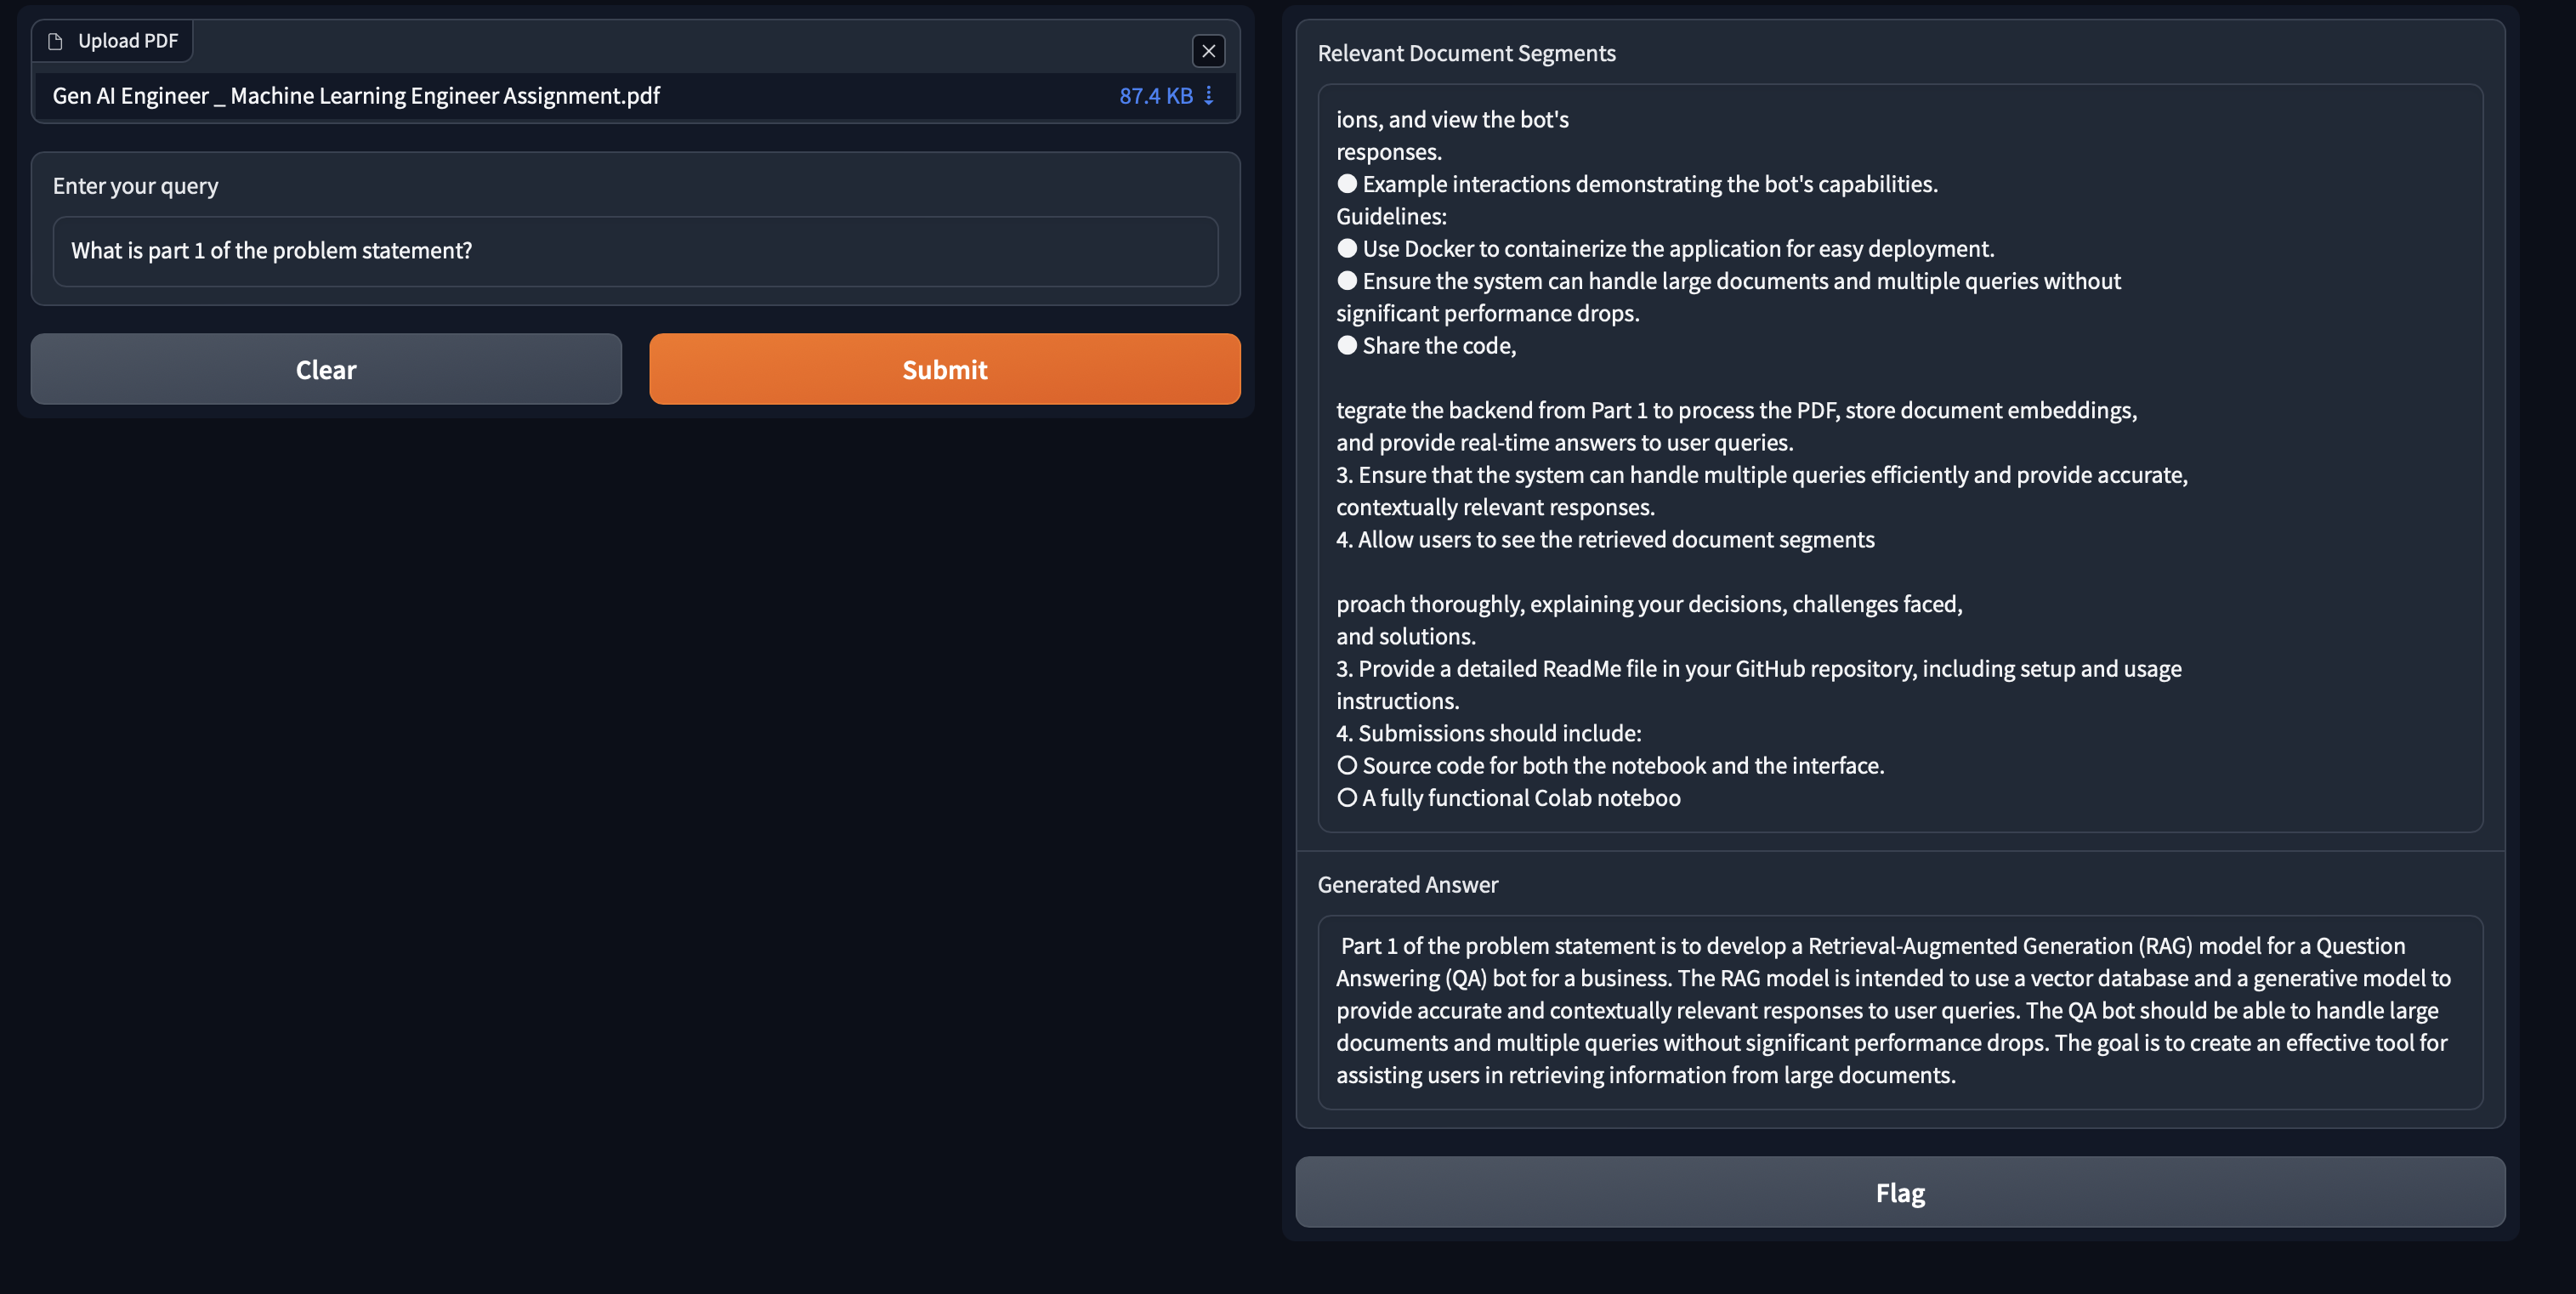

You can run multiple queries for the same document as well.